### Question 5 [10 points]

Reproduce one of the images in Figure 2. If you feel adventurous, you can make more than one!

# Reproducing Figure 2B 

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
import matplotlib.pyplot as plt
import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

In [2]:
# BEGIN SOLUTION

#array of analyzed sat surface temp

analyzed = ds['analysed_sst']

# sst recorded from 2002 to 2012

sst_2002_2006 = analyzed.sel(time = slice("2002-01-01", "2012-12-31"))

# monthly average climatology for timeframe 

average_climate = sst_2002_2006.groupby('time.dayofyear').mean()

# data from June 2013 to July 2016

sst_2013_2016 = analyzed.sel(time=slice('2013-06-01', '2016-07-31')).groupby ('time.dayofyear')

# finding the outliers 

outliers = (sst_2013_2016 - average_climate).idxmax('time').dt.month
outliers


<xarray.DataArray 'month' (lat: 251, lon: 234)>
array([[ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       [ 3.,  3.,  3., ..., 10., 10., 10.],
       ...,
       [ 7.,  6.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  6., ..., nan, nan, nan],
       [ 7.,  7.,  7., ..., nan, nan, nan]])
Coordinates:
    dayofyear  (lat, lon) int64 85 85 85 85 85 85 85 ... 152 152 152 152 152 152
  * lat        (lat) float32 33.0 33.06 33.12 33.18 ... 47.82 47.88 47.94 48.0
  * lon        (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.1 -118.0

Text(0.5, 1.0, 'Figure 2b')

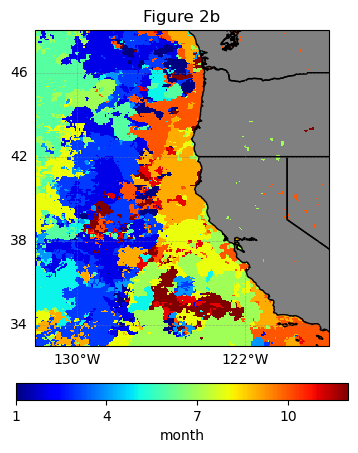

In [3]:
import cartopy.mpl.gridliner as gridliner
import matplotlib.ticker as mticker 

# Custom latitude tick formatter without N
def lat_formatter(x, pos):
    return f"{abs(int(x))}"

# Plotting
outliers.plot()
axis = plt.subplot(projection = crs)
color_bar = {
    'orientation' : 'horizontal', 
    'location' : 'bottom',
    'pad' : 0.1,
    'fraction': 0.045,
    'ticks': [1, 4, 7, 10] 
}
outliers.plot(ax = axis, transform = crs, cmap = "jet", cbar_kwargs = color_bar)
axis.add_feature(cfeature.LAND,  color = "grey")
axis.add_feature(cfeature.STATES.with_scale("10m"))
gl = axis.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = gridliner.LONGITUDE_FORMATTER
gl.yformatter = mticker.FuncFormatter(lat_formatter)
gl.xlocator = gridliner.mticker.FixedLocator([-138, -130, -122])
gl.ylocator = gridliner.mticker.FixedLocator([34, 38, 42, 46]) 
plt.savefig('outputs/climate-Q05.png')
plt.title("Figure 2b")
# END SOLUTION